# Clustering Homework - GI67216
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 



#### reference from class notes 


In [31]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
import warnings
warnings.filterwarnings('ignore')
def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

var0 var1 var2      var3      var4      var5      var6      var7      var8  \
0    a    d    g -0.396805  0.678895  0.726830 -0.640008 -1.039820 -0.934986   
1    a    d    i -0.991416  2.359730 -0.993249 -2.486560 -3.793524 -3.316669   
2    a    d    g -2.075731  0.544290 -0.854121 -0.615142 -0.903471 -0.775623   
3    b    e    i  0.330885  1.100425  1.468506  0.456396 -0.663287 -1.134611   
4    a    d    h  2.245218  1.039071  0.481155 -1.373746 -1.861215 -1.531545   

       var9  ...     var41     var42     var43     var44     var45     var46  \
0 -0.098290  ... -0.268735  0.070548  0.808570  1.523755 -0.497207  0.470146   
1 -0.456288  ...  0.500165  0.348498  3.031635 -0.996257 -1.832063  1.907786   
2 -0.123449  ...  0.207872  0.096783  0.734387  0.564490 -0.439069  0.483492   
3  0.494358  ...  0.963910 -0.474539  0.049557 -0.169026 -0.213812 -0.798086   
4 -0.322933  ...  0.040232  0.263376  1.570320  0.212608 -0.917244  1.131278   

      var47     var48     var49  target  
0  1.095665 -0.339445  0.470146     1.0  
1  4.046193 -1.076047  1.907786     0.0  
2  0.971048 -0.231717  0.483492     0.0  
3  0.419922 -1.142086 -0.798086     1.0  
4  2.034796 -0.363342  1.131278     0.0  

[5 rows x 51 columns]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

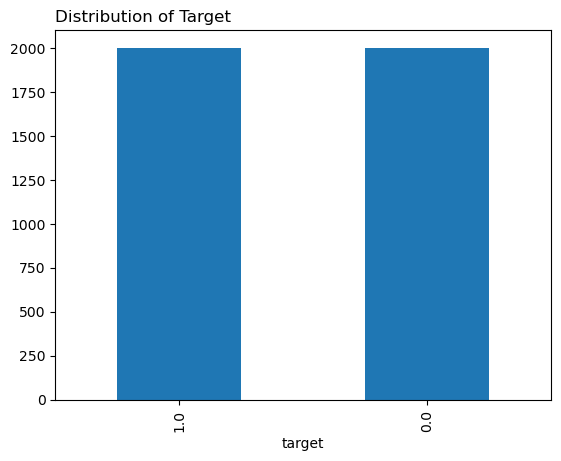

In [34]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

In [36]:
# Insert Code

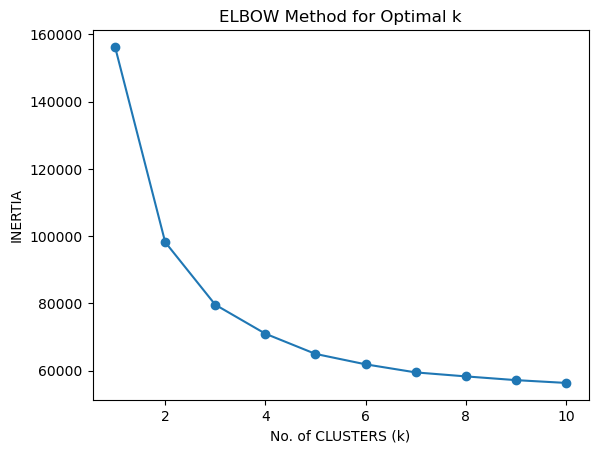

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns



# Here i Identified categorical columns for the first time.....
categorical_cols = X_train.select_dtypes(include=['object']).columns



# here i create the preprocessing pipeline.....
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in X_train.columns if col not in categorical_cols]),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_train_prepro = preprocessor.fit_transform(X_train)



# Here i find the optimal number of clusters using the elbow methodas asked for......
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=2303)
    kmeans.fit(X_train_prepro)
    inertia.append(kmeans.inertia_)


    
# here is the plot of elbow method.......
plt.plot(range(1, 11), inertia, marker='o')
plt.title('ELBOW Method for Optimal k')
plt.xlabel('No. of CLUSTERS (k)')
plt.ylabel('INERTIA')
plt.show()



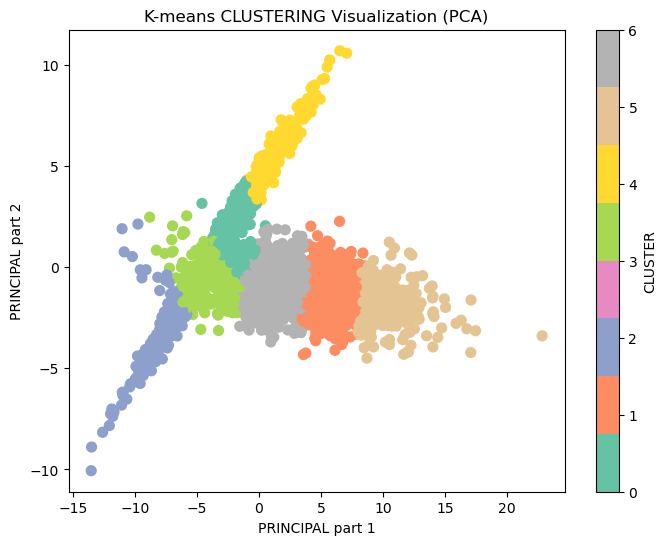

In [72]:
# here i first take the optimal as 7  for Visualizing result using PCA.....
optimal_k = 7



# her ei create a new KMeans instance and fit on the preprocessed data.....
kmeans_o = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_o.fit_predict(X_train_prepro)



# here i applied PCA for visualization.....
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_prepro)



# here is the Visualize clusters.....
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set2', s=50)
plt.title('K-means CLUSTERING Visualization (PCA)')
plt.xlabel('PRINCIPAL part 1')
plt.ylabel('PRINCIPAL part 2')
plt.colorbar(label='CLUSTER')
plt.show()



Insert conclusions

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [73]:
# Insert Code

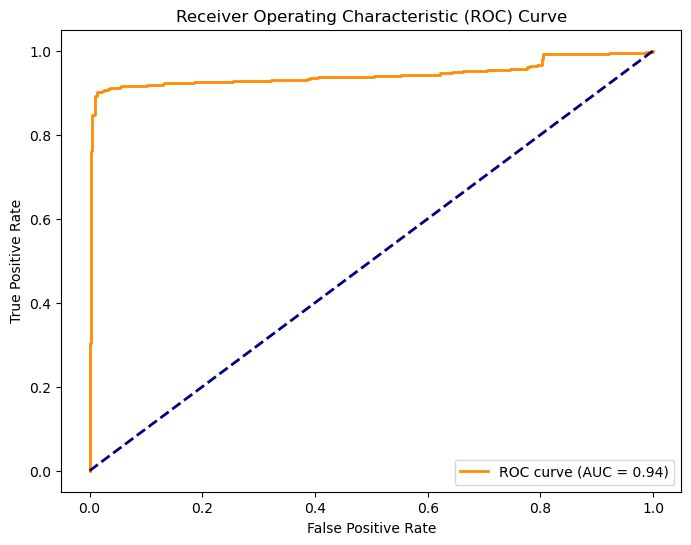

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score



# here i create a preprocessing pipeline....
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['number']).columns),
        ('cat', OneHotEncoder(), X_train.select_dtypes(include=['object']).columns)
    ])



# here i create a logistic regression pipeline....
lr_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])



# here i perform grid search with cross-validation.....
param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(lr_pipe, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)



# here i get the best model.....
best_lr_model = grid_search.best_estimator_



# here i evaluate the model on the test set.....
y_pred_proba = best_lr_model.predict_proba(X_test)[:, 1]




# here is the ROC chart....
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



# here is the Cross-validation with best model......
cv_accuracy = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy').mean()



# here is the Calculation for metrics.....
y_pred = best_lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


In [75]:
print(f"CV ACCURACY: {cv_accuracy:.4f}")
print(f"ACCURACY: {accuracy:.4f}")
print(f"PRECISION: {precision:.4f}")
print(f"RECALL: {recall:.4f}")

CV ACCURACY: 0.9372
ACCURACY: 0.9250
PRECISION: 0.9887
RECALL: 0.8621


Insert conclusions

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [76]:
# Insert code

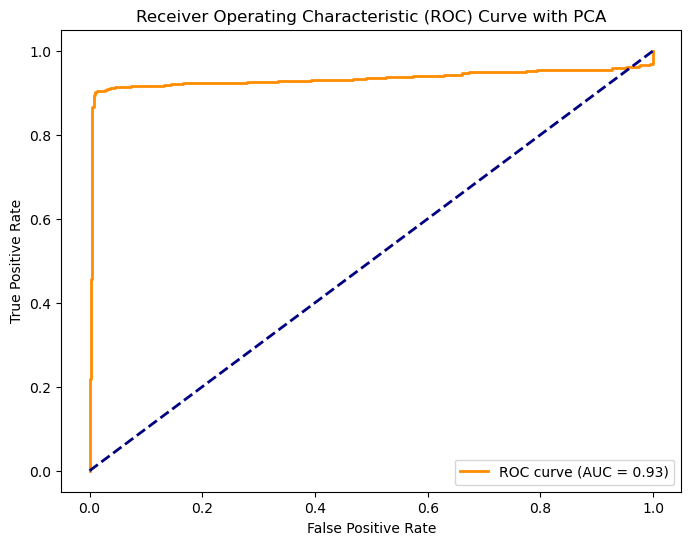

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# here i create a logistic regression pipeline with PCA.....
pca_lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('classifier', LogisticRegression())
])

# here i perform grid search with cross-validation.....
param_grid_pca = {
    'pca__n_components': [2, 5, 10, 20],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search_pca = GridSearchCV(pca_lr_pipeline, param_grid_pca, cv=5, scoring='roc_auc')
grid_search_pca.fit(X_train, y_train)



# here i Get the best model....
best_pca_lr_model = grid_search_pca.best_estimator_



# here i evaluate the model on the test set...
y_pred_proba_pca = best_pca_lr_model.predict_proba(X_test)[:, 1]



# hereis this ROC chart...
fpr_pca, tpr_pca, _ = roc_curve(y_test, y_pred_proba_pca)
roc_auc_pca = auc(fpr_pca, tpr_pca)

plt.figure(figsize=(8, 6))
plt.plot(fpr_pca, tpr_pca, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_pca:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with PCA')
plt.legend(loc='lower right')
plt.show()



# here is calculation of metrics.....
y_pred_pca = best_pca_lr_model.predict(X_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)

In [81]:
print(f"ACCURACY with PCA: {accuracy_pca:.4f}")
print(f"PRECISION with PCA: {precision_pca:.4f}")
print(f"RECALL with PCA: {recall_pca:.4f}")

ACCURACY with PCA: 0.9300
PRECISION with PCA: 0.9916
RECALL with PCA: 0.8695


Insert conclusions

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [78]:
# Insert code

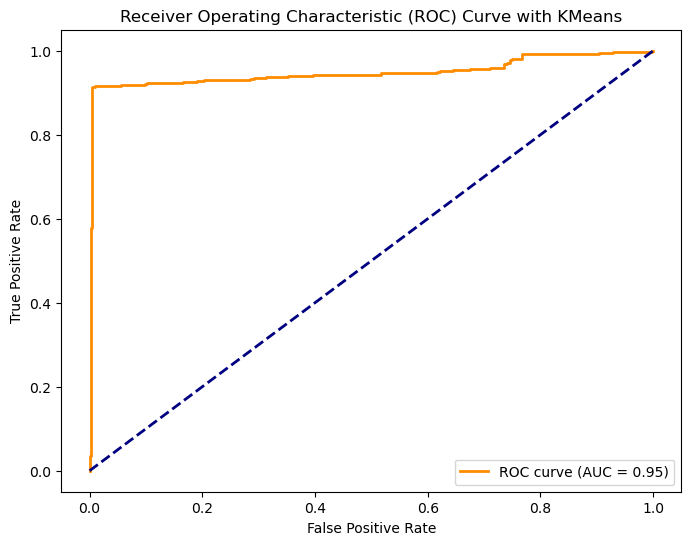

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score



#here i create a pipeline with KMeans clustering.....
kmeans_lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans()),
    ('classifier', LogisticRegression())
])



#here i perform grid search with cross-validation.....
param_grid_kmeans = {
    'kmeans__n_clusters': [2, 3, 4, 5],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search_kmeans = GridSearchCV(kmeans_lr_pipeline, param_grid_kmeans, cv=5, scoring='roc_auc')
grid_search_kmeans.fit(X_train, y_train)




# here is the best model.....
best_kmeans_lr_model = grid_search_kmeans.best_estimator_



# here i evaluate the model on the test set....
y_pred_proba_kmeans = best_kmeans_lr_model.predict_proba(X_test)[:, 1]



# here is the ROC chart.....
fpr_kmeans, tpr_kmeans, _ = roc_curve(y_test, y_pred_proba_kmeans)
roc_auc_kmeans = auc(fpr_kmeans, tpr_kmeans)

plt.figure(figsize=(8, 6))
plt.plot(fpr_kmeans, tpr_kmeans, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_kmeans:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with KMeans')
plt.legend(loc='lower right')
plt.show()



# here is calculation of metrics.....
y_pred_kmeans = best_kmeans_lr_model.predict(X_test)
accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)
precision_kmeans = precision_score(y_test, y_pred_kmeans)
recall_kmeans = recall_score(y_test, y_pred_kmeans)




In [82]:
print(f"ACCURACY with kmeans: {accuracy_kmeans:.4f}")
print(f"PRECISION with kmeans: {precision_kmeans:.4f}")
print(f"RECALL with kmeans: {recall_kmeans:.4f}")

ACCURACY with kmeans: 0.9463
PRECISION with kmeans: 0.9946
RECALL with kmeans: 0.8990


Insert conclusions

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

In [80]:
# here is the comparison between the performance of the models....
model_performances = {
    'Logistic Regression': {'AUC': roc_auc, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall},
    'PCA + Logistic Regression': {'AUC': roc_auc_pca, 'Accuracy': accuracy_pca, 'Precision': precision_pca, 'Recall': recall_pca},
    'KMeans + Logistic Regression': {'AUC': roc_auc_kmeans, 'Accuracy': accuracy_kmeans, 'Precision': precision_kmeans, 'Recall': recall_kmeans}
}

# here i choose the model which have the highest AUC for this model.....
best_model = max(model_performances, key=lambda k: model_performances[k]['AUC'])


print(f"The BEST MODEL based on AUC is: {best_model}")


The BEST MODEL based on AUC is: KMeans + Logistic Regression


##### the best model to get in use by  my side is KMeans + Logistic Regression as give more accurate results with precision and recall.....

Insert response